In [31]:
import numpy as np
import imageio
import matplotlib.pyplot as plt

In [3]:
filename = str(input()).rstrip() # Caso1: camera.png
method = int(input()) # Caso1: 1
save = int(input()) # Caso1:  0

camera.png
1
0


In [33]:
input_img = imageio.imread('../images/'+filename)

In [27]:
def unpadding(img, a):
    return img[a:img.shape[0]-a, a:img.shape[1]-a]

In [16]:
def padding(img, a, nrows, ncols):
    img =  np.concatenate((img, np.zeros([a, ncols])), axis=0)
    img =  np.concatenate((np.zeros([a, ncols]), img), axis=0)
    img =  np.concatenate((np.zeros([nrows+2*a, a]), img), axis=1)
    img =  np.concatenate(( img, np.zeros([nrows+2*a, a])), axis=1)
    return img

In [8]:
# Gaussian Function
def gaussian_kernel(x, sigma):
    return (1/(2*np.pi*(sigma**2)))*np.exp((-x**2)/(2*(sigma**2)))

In [9]:
# STEP 1: Computing the spatial Gaussian component:

def spatial_gaussian_component(n, sigma):
    w = np.zeros([n, n]) # creating the kernel
    a = int((n-1)/2)
    for x in range(n):
        for y in range (n):
            ## Euclidian Distance between this pixel and the center pixel
            euclidian = np.sqrt((x-a)**2+ (y-a)**2)
            w[x,y] =  gaussian_kernel(euclidian, sigma)
            
    return w

In [22]:
def bilateral_filter(input_img, kernel_size, sigma_s, sigma_r):

    ## Adding padding zero in the input image
    nrows, ncols =  input_img.shape
    a = int((n-1)/2)
    
    input_img = padding(input_img, a, nrows, ncols)

    ## Calculating the spatial component centered at the pixel (x,y)
    spatial_gaussian = spatial_gaussian_component(n, sigma_s)

    ## Creating the output image as a zero matriz
    output_img = np.zeros(input_img.shape, dtype=np.uint8)
    nrows, ncols = input_img.shape

    for x in range (a, nrows-a):
        for y in range (a, ncols-a):

            # for every pixel, the normalization factor (Wp)
            # and the the Intensity of the output pixel 
            # are initialized as 0
            Wp = 0 
            If = 0

            # gets subImage
            sub_img = input_img[ x-a : x+a+1 , y-a:y+a+1 ]

            ## Calculating the range gaussian for every neighboor of pixel (x,y)
            range_gaussian = gaussian_kernel(sub_img - input_img[x,y], sigma_r)


            ## Final value of the filter
            w = np.multiply(range_gaussian, spatial_gaussian)

            ## Calculating the normalization factor by summing the filter's values
            Wp = np.sum(w)

            ## Multiplying the filter's value of each pixel by its intensity in the input image
            ## And summing all these values
            If = np.sum(np.multiply(w, sub_img))

            ## Finally, calculating the output value of the pixel (x,y)
            ## by dividing it by the normalization value
            output_img[x,y] =  If/Wp
    return unpadding(input_img,a), unpadding(output_img,a)

In [34]:
if method == 1:
    n = int(input()) 
    sigma_s = float(input()) 
    sigma_r = float(input()) 
    input_img, output_img = bilateral_filter(input_img, n, sigma_s, sigma_r)

3
150
100


In [35]:
#ERRO 
## Result caso 1: 3429.3622
rse = np.sqrt(np.sum((input_img.astype(float) - output_img.astype(float))**2))

# Printing the error rounding to 4 decimal places.
print('{:.4f}'.format(rse))

3429.3613


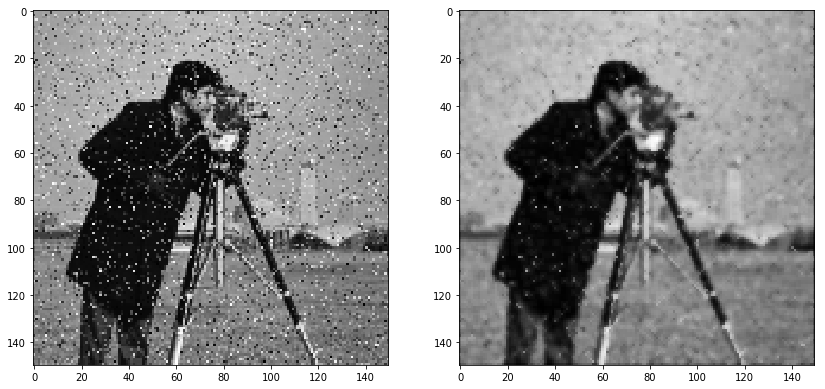

In [36]:
plt.figure(figsize=(14,7))
plt.subplot(121)
plt.imshow(input_img, cmap="gray")

plt.subplot(122)
plt.imshow(output_img, cmap="gray")